In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
from squarify import squarify

In [3]:
df = pd.read_csv('Student Depression Dataset.csv')

In [4]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

# **Depression across the Age Group**

In [5]:
bins = [18, 25, 35, 45, 55, 60] 
labels = ['18-25', '26-35', '36-45', '46-55', '56-60']
df['Age-Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)


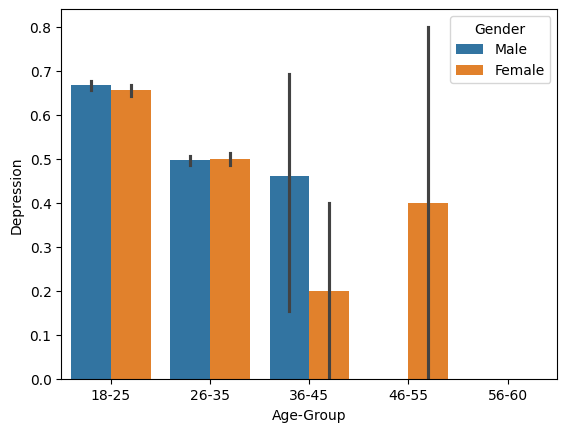

In [6]:
sns.barplot(
    df,
    x='Age-Group',
    y='Depression',
    hue='Gender'
)
plt.show()

# **Depression by the Education Degrees**

In [51]:
top_degree = (
    df.groupby('Degree')['Depression']
    .sum()
    .reset_index()
    .sort_values(by='Depression', ascending=False)
    .head(10)
)




fig = px.pie(
    top_degree,
    names='Degree',
    values='Depression',
    title='Top 10 Degrees with Most Depression Cases',
    hole=0.5
)
fig.update_traces(
    textinfo='percent+label',
    textposition='inside'
)


fig.show()


# **Occurrence of Suicidal Thoughts Gender Wise**

In [8]:

grouped_data = df.groupby(['Gender', 'Have you ever had suicidal thoughts ?']).size().reset_index(name='Count')

px.bar(
    grouped_data,
    x='Gender',
    y='Count',
    color='Have you ever had suicidal thoughts ?',
    barmode='group',
    title='Suicidal Thoughts by Gender',
    labels={'Have you ever had suicidal thoughts?': 'Suicidal Thoughts'}
).show()

# **Impact of Sleep Duration on Depression Cases**

In [ ]:
sleep_duration_depression = df.groupby('Sleep Duration')['Depression'].sum().reset_index()
px.bar(
    sleep_duration_depression,
    x='Sleep Duration',
    y='Depression',
    color='Sleep Duration'
).show()


# **Impact of Dietary Habits on Depression**

In [39]:
diet_depression = df['Dietary Habits'].value_counts().reset_index()

fig = px.pie(
    diet_depression,
    names='Dietary Habits',
    values = 'count'
)
fig.update_traces(
    textinfo='percent+label',
    textposition='inside'
)
fig.show()

# **Top Cities with Highest Depression Cases**

In [46]:
top_citites_depression = df.groupby(['City'])['Depression'].sum().reset_index().sort_values(by='Depression',ascending=False).head(10)

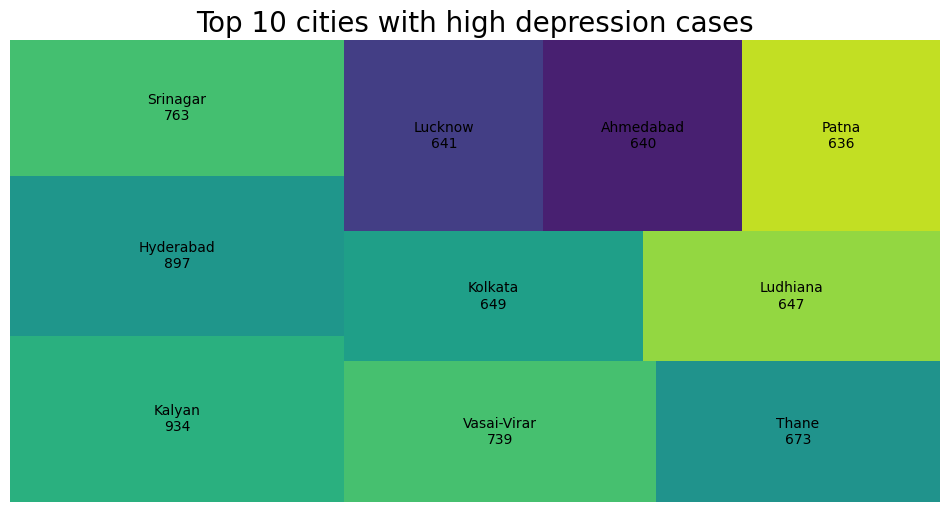

In [ ]:
sizes  = top_citites_depression['Depression']
labels =top_citites_depression['City'] + "\n" + top_citites_depression['Depression'].astype('str')
plt.figure(figsize=(12,6))

squarify.plot(sizes=sizes,label = labels)
plt.axis('off')
plt.title('Top 10 cities with high depression cases',fontsize=20)
plt.show()